<a href="https://colab.research.google.com/github/ShruthiVidya-git/Stock-Market-Trend-Analysis/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas_datareader
#!pip install yfinance

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
#import yfinance as yf
from sklearn.model_selection import TimeSeriesSplit

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import keras

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from keras.wrappers.scikit_learn import KerasRegressor


from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
company = ['AAPL','GOOG','AMZN','XOM','EOG','CVX','CAT','NUE','DHI','DC=F']
start = dt.datetime(1991,1,1)
end = dt.datetime(2021,1,1)
data = []
for c in company :
  df = web.DataReader(c, 'yahoo', start, end)
  data.append(df)


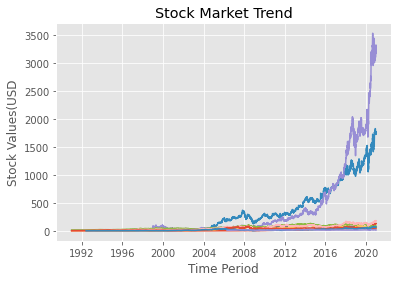

In [ ]:
plt.style.use('ggplot') 
test_data_scaled = []
train_data_scaled = []
scaler_list = []


for i,df in enumerate(data):
  # separate df with close prices and separate train and test data and scale
  close = df.filter(['Close'])
  train_len = math.ceil(len(close)*0.8)
  train_data = close[0:train_len]
  test_data = close[train_len:]

  # scale the train and test data to avoid leakage into test
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_train = scaler.fit_transform(train_data)
  scaled_test = scaler.transform(test_data)
  
  train_data_scaled.append(np.ravel(scaled_train))
  test_data_scaled.append(np.ravel(scaled_test))

  scaler_list.append(scaler)

  
  plt.xlabel("Time Period")
  plt.ylabel("Stock Values(USD")
  plt.title("Stock Market Trend")
  #plt.legend(['Apple','Google','Amazon','Exxon Mobil Corporation','EOG Resources Inc.','Chevron Corp Caterpillar Inc.','Caterpillar','Nucor Corporation','D R Horton Inc','Gold '], loc ="upper left")
  plt.plot(close)

In [ ]:

# function for generating the lagged matrix
def split_sequence(sequence, window_size):
    X = []
    y = []

    for i in range(len(sequence)):
        end_idx = i + window_size
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
X_train_data = []
y_train_data = []

for i,df in enumerate(train_data_scaled):
  X_train, y_train = split_sequence(df, window_size=60)
  X_train_data.append(X_train)
  y_train_data.append(y_train)

X_test_data = []
y_test_data = []

for i,df in enumerate(test_data_scaled):
  X_test, y_test = split_sequence(df, window_size=60)
  X_test_data.append(X_test)
  y_test_data.append(y_test)
  

In [ ]:
company_names = ['Apple','Google','Amazon','Exxon Mobil Corporation','EOG Resources Inc.','Chevron Corp Caterpillar Inc.','Caterpillar','Nucor Corporation','D R Horton Inc','Gold ']

In [ ]:
def model():  

  '''
  lstm = Sequential()
  lstm.add(LSTM(64, input_shape= (X_train_data[i].shape[1],1), activation='relu', return_sequences=True))
  lstm.add(LSTM(64, return_sequences=False))
  lstm.add(Dense(25))
  lstm.add(Dense(1))
  ''' 
  lstm = Sequential()
  lstm.add(LSTM(32, input_shape=(trainX.shape[1],1), activation='relu', return_sequences=False))
  lstm.add(Dense(1))
  lstm.compile(loss='mean_squared_error', optimizer='adam')
  #lstm.summary()
  return lstm


Epoch 1/10
188/188 [==============================] - 23s 117ms/step - loss: 8.5987e-04
Epoch 2/10
188/188 [==============================] - 21s 112ms/step - loss: 0.0028
Epoch 3/10
188/188 [==============================] - 21s 114ms/step - loss: 0.0013
Epoch 4/10
188/188 [==============================] - 22s 116ms/step - loss: 0.0018
Epoch 5/10
188/188 [==============================] - 21s 114ms/step - loss: 0.0019
Epoch 6/10
188/188 [==============================] - 23s 124ms/step - loss: 6.9642e-04
Epoch 7/10
188/188 [==============================] - 21s 114ms/step - loss: 5.0015e-04
Epoch 8/10
188/188 [==============================] - 21s 111ms/step - loss: 2.2598e-04
Epoch 9/10
188/188 [==============================] - 22s 118ms/step - loss: 1.7242e-04
Epoch 10/10
188/188 [==============================] - 21s 111ms/step - loss: 1.2507e-04
0.2426668816131282


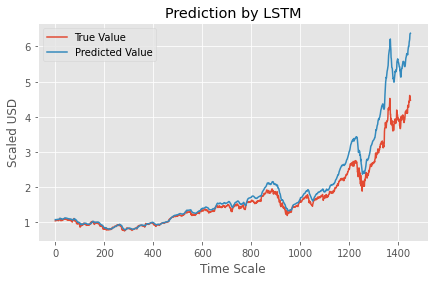

Epoch 1/10
102/102 [==============================] - 13s 113ms/step - loss: 0.0027
Epoch 2/10
102/102 [==============================] - 12s 116ms/step - loss: 0.0022
Epoch 3/10
102/102 [==============================] - 12s 116ms/step - loss: 0.0017
Epoch 4/10
102/102 [==============================] - 12s 113ms/step - loss: 0.0014
Epoch 5/10
102/102 [==============================] - 12s 116ms/step - loss: 0.0010
Epoch 6/10
102/102 [==============================] - 11s 110ms/step - loss: 0.0010
Epoch 7/10
102/102 [==============================] - 12s 115ms/step - loss: 7.1020e-04
Epoch 8/10
102/102 [==============================] - 12s 115ms/step - loss: 4.4738e-04
Epoch 9/10
102/102 [==============================] - 12s 115ms/step - loss: 3.2485e-04
Epoch 10/10
102/102 [==============================] - 11s 113ms/step - loss: 2.9951e-04
0.06613153727810653


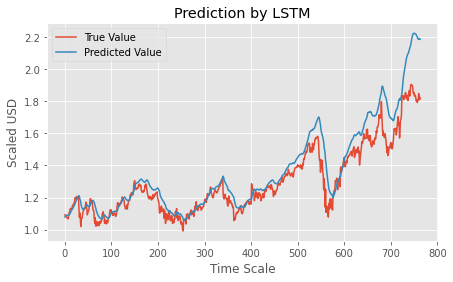

Epoch 1/10
147/147 [==============================] - 18s 115ms/step - loss: 0.0020
Epoch 2/10
147/147 [==============================] - 16s 110ms/step - loss: 0.0042
Epoch 3/10
147/147 [==============================] - 17s 114ms/step - loss: 0.0067
Epoch 4/10
147/147 [==============================] - 17s 113ms/step - loss: 0.0047
Epoch 5/10
147/147 [==============================] - 16s 112ms/step - loss: 0.0032
Epoch 6/10
147/147 [==============================] - 16s 111ms/step - loss: 0.0015
Epoch 7/10
147/147 [==============================] - 16s 112ms/step - loss: 7.0178e-04
Epoch 8/10
147/147 [==============================] - 17s 117ms/step - loss: 4.0446e-04
Epoch 9/10
147/147 [==============================] - 17s 113ms/step - loss: 2.4879e-04
Epoch 10/10
147/147 [==============================] - 16s 111ms/step - loss: 2.1118e-04
5.182505861608194


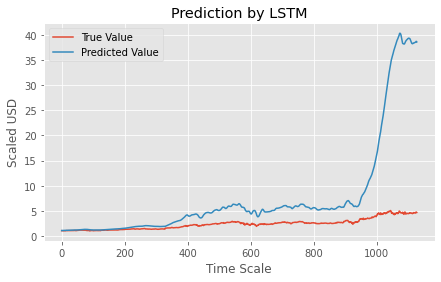

Epoch 1/10
188/188 [==============================] - 22s 112ms/step - loss: 8.4966e-04
Epoch 2/10
188/188 [==============================] - 22s 116ms/step - loss: 0.0020
Epoch 3/10
188/188 [==============================] - 22s 116ms/step - loss: 0.0017
Epoch 4/10
188/188 [==============================] - 21s 112ms/step - loss: 0.0014
Epoch 5/10
188/188 [==============================] - 21s 114ms/step - loss: 0.0012
Epoch 6/10
188/188 [==============================] - 21s 112ms/step - loss: 7.2761e-04
Epoch 7/10
188/188 [==============================] - 21s 113ms/step - loss: 4.7001e-04
Epoch 8/10
188/188 [==============================] - 22s 114ms/step - loss: 3.0569e-04
Epoch 9/10
188/188 [==============================] - 21s 112ms/step - loss: 2.0602e-04
Epoch 10/10
188/188 [==============================] - 22s 115ms/step - loss: 1.9558e-04
0.005703623905527018


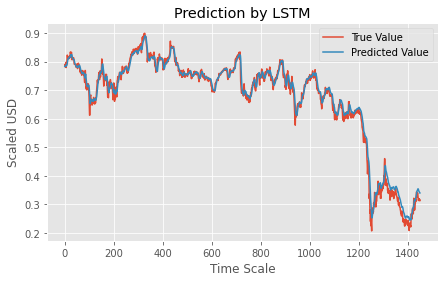

Epoch 1/10
188/188 [==============================] - 23s 116ms/step - loss: 8.4437e-04
Epoch 2/10
188/188 [==============================] - 22s 115ms/step - loss: 0.0020
Epoch 3/10
188/188 [==============================] - 27s 142ms/step - loss: 0.0012
Epoch 4/10
188/188 [==============================] - 22s 118ms/step - loss: 5.1278e-04
Epoch 5/10
188/188 [==============================] - 22s 118ms/step - loss: 2.6381e-04
Epoch 6/10
188/188 [==============================] - 21s 114ms/step - loss: 1.8669e-04
Epoch 7/10
188/188 [==============================] - 22s 119ms/step - loss: 1.6349e-04
Epoch 8/10
188/188 [==============================] - 21s 113ms/step - loss: 1.4984e-04
Epoch 9/10
188/188 [==============================] - 21s 112ms/step - loss: 1.4633e-04
Epoch 10/10
188/188 [==============================] - 22s 114ms/step - loss: 1.3537e-04
0.011875111071778192


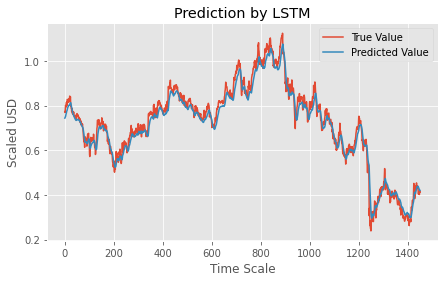

Epoch 1/10
188/188 [==============================] - 24s 120ms/step - loss: 8.9940e-04
Epoch 2/10
188/188 [==============================] - 23s 122ms/step - loss: 0.0023
Epoch 3/10
188/188 [==============================] - 23s 123ms/step - loss: 0.0017
Epoch 4/10
188/188 [==============================] - 23s 121ms/step - loss: 8.6231e-04
Epoch 5/10
188/188 [==============================] - 23s 122ms/step - loss: 8.3273e-04
Epoch 6/10
188/188 [==============================] - 23s 121ms/step - loss: 6.0069e-04
Epoch 7/10
188/188 [==============================] - 22s 117ms/step - loss: 3.2840e-04
Epoch 8/10
188/188 [==============================] - 23s 120ms/step - loss: 2.9081e-04
Epoch 9/10
188/188 [==============================] - 23s 121ms/step - loss: 2.8341e-04
Epoch 10/10
188/188 [==============================] - 23s 123ms/step - loss: 3.2143e-04
0.021744116369284434


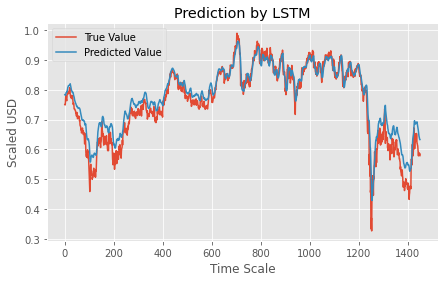

Epoch 1/10
188/188 [==============================] - 23s 114ms/step - loss: 0.0019
Epoch 2/10
188/188 [==============================] - 22s 116ms/step - loss: 0.0034
Epoch 3/10
188/188 [==============================] - 22s 118ms/step - loss: 0.0018
Epoch 4/10
188/188 [==============================] - 22s 116ms/step - loss: 8.9589e-04
Epoch 5/10
188/188 [==============================] - 22s 119ms/step - loss: 5.6211e-04
Epoch 6/10
188/188 [==============================] - 22s 119ms/step - loss: 3.7539e-04
Epoch 7/10
188/188 [==============================] - 23s 122ms/step - loss: 3.1302e-04
Epoch 8/10
188/188 [==============================] - 22s 117ms/step - loss: 2.9489e-04
Epoch 9/10
188/188 [==============================] - 22s 116ms/step - loss: 2.7684e-04
Epoch 10/10
188/188 [==============================] - 22s 120ms/step - loss: 2.7659e-04
0.005173108112583167


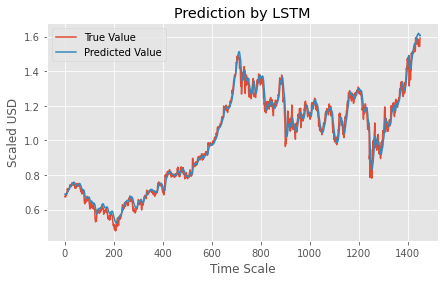

Epoch 1/10
188/188 [==============================] - 24s 119ms/step - loss: 8.8297e-04
Epoch 2/10
188/188 [==============================] - 23s 122ms/step - loss: 0.0022
Epoch 3/10
188/188 [==============================] - 22s 119ms/step - loss: 0.0014
Epoch 4/10
188/188 [==============================] - 22s 115ms/step - loss: 7.9097e-04
Epoch 5/10
188/188 [==============================] - 22s 119ms/step - loss: 4.8094e-04
Epoch 6/10
188/188 [==============================] - 23s 122ms/step - loss: 3.6112e-04
Epoch 7/10
188/188 [==============================] - 22s 118ms/step - loss: 3.1522e-04
Epoch 8/10
188/188 [==============================] - 23s 120ms/step - loss: 3.0700e-04
Epoch 9/10
188/188 [==============================] - 22s 118ms/step - loss: 3.0452e-04
Epoch 10/10
188/188 [==============================] - 22s 117ms/step - loss: 3.0382e-04
0.0057352396125335105


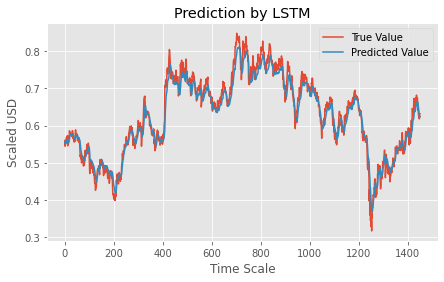

Epoch 1/10
179/179 [==============================] - 22s 118ms/step - loss: 0.0011
Epoch 2/10
179/179 [==============================] - 21s 118ms/step - loss: 0.0014
Epoch 3/10
179/179 [==============================] - 21s 118ms/step - loss: 9.9275e-04
Epoch 4/10
179/179 [==============================] - 21s 118ms/step - loss: 5.9101e-04
Epoch 5/10
179/179 [==============================] - 21s 115ms/step - loss: 4.1715e-04
Epoch 6/10
179/179 [==============================] - 21s 116ms/step - loss: 3.3037e-04
Epoch 7/10
179/179 [==============================] - 21s 120ms/step - loss: 2.8424e-04
Epoch 8/10
179/179 [==============================] - 21s 119ms/step - loss: 2.5778e-04
Epoch 9/10
179/179 [==============================] - 20s 114ms/step - loss: 2.3963e-04
Epoch 10/10
179/179 [==============================] - 21s 115ms/step - loss: 2.3983e-04
0.03530322891083157


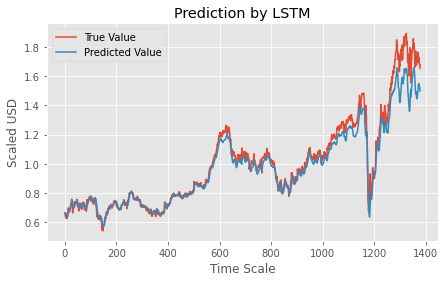

Epoch 1/10
88/88 [==============================] - 12s 117ms/step - loss: 0.1243
Epoch 2/10
88/88 [==============================] - 10s 115ms/step - loss: 0.0084
Epoch 3/10
88/88 [==============================] - 11s 123ms/step - loss: 0.0047
Epoch 4/10
88/88 [==============================] - 11s 126ms/step - loss: 0.0038
Epoch 5/10
88/88 [==============================] - 11s 122ms/step - loss: 0.0030
Epoch 6/10
88/88 [==============================] - 11s 121ms/step - loss: 0.0019
Epoch 7/10
88/88 [==============================] - 11s 123ms/step - loss: 0.0013
Epoch 8/10
88/88 [==============================] - 11s 120ms/step - loss: 0.0011
Epoch 9/10
88/88 [==============================] - 11s 122ms/step - loss: 0.0011
Epoch 10/10
88/88 [==============================] - 10s 118ms/step - loss: 0.0011
0.0019612960093523864


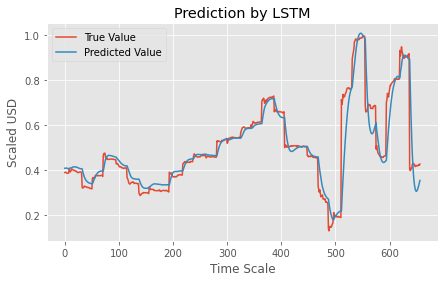

In [ ]:
loss = []
y_preds = []
for i,trainX in enumerate(X_train_data): 

    #Building the LSTM Model with k fold cross validation
    tf.keras.backend.clear_session()

    np.random.seed(7)
    

    '''
    lstm = Sequential()
    lstm.add(LSTM(64, input_shape= (X_train_data[i].shape[1],1), activation='relu', return_sequences=True))
    lstm.add(LSTM(64, return_sequences=False))
    lstm.add(Dense(25))
    lstm.add(Dense(1))
    ''' 
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(trainX.shape[1],1), activation='relu', return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss='mean_squared_error', optimizer='adam')

    history = lstm.fit(X_train_data[i], y_train_data[i], epochs=10, batch_size=32, verbose=1, shuffle=False)
    y_pred = lstm.predict(X_test_data[i])

    y_preds.append(y_pred)
    rmse = np.sqrt(np.mean(y_pred-y_test_data[i])**2) 
    loss.append(rmse)
    print(rmse)
    #Predicted vs True Close Price – LSTM
    plt.figure(figsize=(7,4))
    plt.plot(y_test_data[i], label='True Value')
    plt.plot(y_pred, label='Predicted Value')
    plt.title("Prediction by LSTM")
    plt.xlabel('Time Scale')
    plt.ylabel('Scaled USD')
    plt.legend()
    plt.show() 
  
    tf.keras.backend.clear_session()


Apple - RMSE - 0.2426668816131282
Google - RMSE - 0.06613153727810653
Amazon - RMSE - 5.182505861608194
Exxon Mobil Corporation - RMSE - 0.005703623905527018
EOG Resources Inc. - RMSE - 0.011875111071778192
Chevron Corp Caterpillar Inc. - RMSE - 0.021744116369284434
Caterpillar - RMSE - 0.005173108112583167
Nucor Corporation - RMSE - 0.0057352396125335105
D R Horton Inc - RMSE - 0.03530322891083157
Gold  - RMSE - 0.0019612960093523864


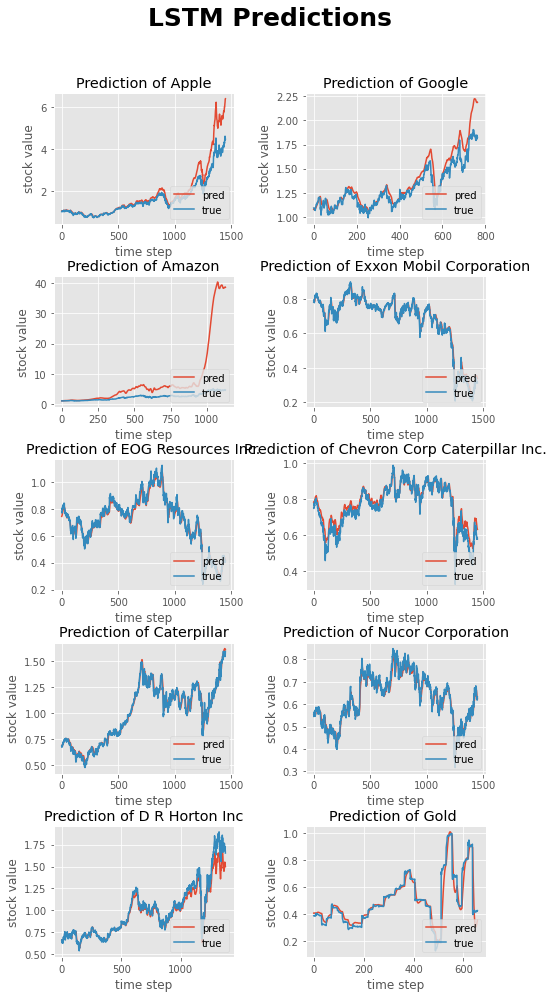

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 10})
plt.title("Predicted values of LSTM Model")
plots = []
k=0
for i in range(5):
    for j in range(2):
        ax = plt.subplot2grid((5,2), (i,j))
        ax.plot(y_preds[k])
        ax.plot(y_test_data[k])
        
        plt.ylabel("stock value")
        plt.xlabel("time step",)
        title_str = "Prediction of " + company_names[k] 
        print(f"{company_names[k]} - RMSE - {loss[k]}")
        plt.title(title_str)
        ax.legend(["pred", "true"], loc ="lower right")
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9, wspace=0.4, hspace=0.4)
        k=k+1

plt.suptitle('LSTM Predictions\n\n', fontweight ="bold", y=0.98,x=0.3,fontsize=25)
plt.show()